<a href="https://colab.research.google.com/github/Tashipalden/Python/blob/main/Copy_of_COVID19_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 Data Analysis

**Description:** This script will read the latest data from the New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 28 days' worth of data for the selected county, and save the county's data for all dates to a comma-separated value (.csv) file on your computer. The printed data can be copied and pasted directly into a spreadsheet for further analysis and visualization.

**Note:** For information about the data, see https://github.com/nytimes/covid-19-data.

**Note:** After you have run the script one time in a given Anaconda environment, you may reduce the script's execution time by adding a `#` in front of `pip install pandas`. For example, `#pip install pandas` instead of `pip install pandas`. The `#` will tell Python to skip the code without running it.

# Task 1 : Environment Set up

Import all required libraries that are needed for data analysis

# Task 2 :  Data Collection

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data anlysis purpose

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [6]:
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [7]:
df.shape

(48614, 5)

In [8]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

Analyzing New York state data for Covid 19

In [9]:
ny_df = df[df['state']=='New York']

In [10]:
ny_df.head()

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0


In [11]:
ny_df.shape

(880, 5)

In [12]:
ny_df.tail()

,date,state,fips,cases,deaths
48368,2022-07-24,New York,36,5758805,69408
48424,2022-07-25,New York,36,5773608,69435
48480,2022-07-26,New York,36,5778917,69495
48536,2022-07-27,New York,36,5785423,69522
48592,2022-07-28,New York,36,5793691,69564


In [13]:
#first death in NY
first_ny_death = ny_df[ny_df['deaths']!=0]
first_ny_death.head()

,date,state,fips,cases,deaths
669,2020-03-14,New York,36,610,2
722,2020-03-15,New York,36,732,6
775,2020-03-16,New York,36,950,10
828,2020-03-17,New York,36,1375,18
882,2020-03-18,New York,36,2387,32


In [14]:
#total number of cases
ny_df['cases'].max()

5793691

In [15]:
# not a correct way of calculating total count bcoz data is cumulative
ny_df['cases'].sum()

1967460447

There are total of 1967460447 cases in new york

Finding new covid 19 cases on daily basis (new cases added everyday)

In [16]:
#new cases for NY
# type(ny_df['cases'])

newcase = []
previuos_case = 0
for index, row in ny_df.iterrows():
  current_case = row['cases']
  newcase_count = current_case - previuos_case
  previuos_case = current_case
  newcase.append(newcase_count)
  # print(newcase_count)

In [17]:
ny_df['new_cases'] = newcase

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
ny_df.head(10)

,date,state,fips,cases,deaths,new_cases
246,2020-03-01,New York,36,1,0,1
261,2020-03-02,New York,36,1,0,0
276,2020-03-03,New York,36,2,0,1
293,2020-03-04,New York,36,11,0,9
313,2020-03-05,New York,36,22,0,11
338,2020-03-06,New York,36,44,0,22
369,2020-03-07,New York,36,89,0,45
404,2020-03-08,New York,36,106,0,17
440,2020-03-09,New York,36,142,0,36
478,2020-03-10,New York,36,173,0,31


In [19]:
ny_df['new_cases'].sum()

5793691

There are total of 5793691 new cases

In [20]:
ny_cases = ny_df['cases']
ny_deaths = ny_df['deaths']
ny_dates = ny_df['date']
ny_new_cases = ny_df['new_cases']

In [21]:
type(ny_new_cases)

pandas.core.series.Series

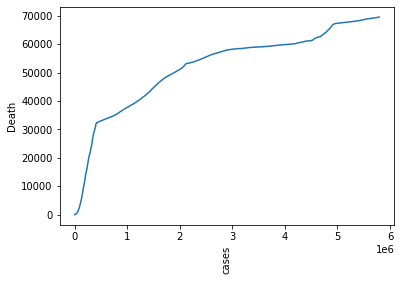

In [39]:
fig, ax=plt.subplots()
ax.plot(ny_cases,ny_deaths)
ax.set_xlabel("cases",rotation=90)
ax.set_ylabel("Death",rotation =90)
plt.show()

Cases and death rate has increases drastically in new york. 

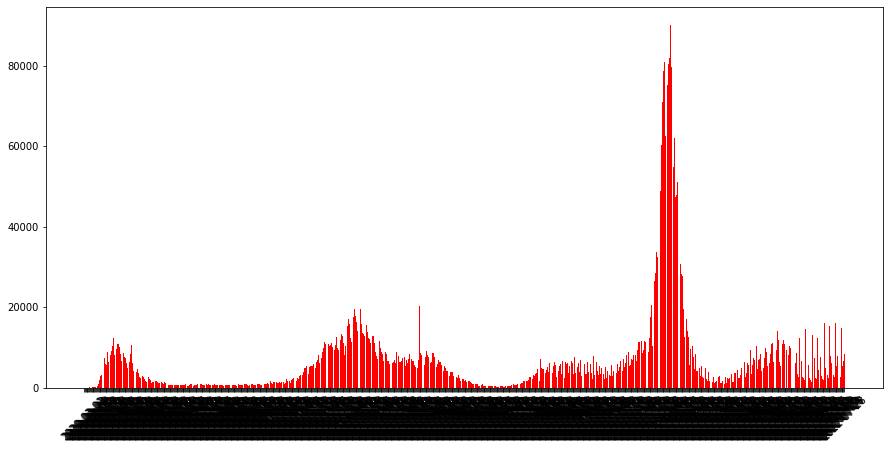

In [49]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates, height=ny_new_cases, color='red')
plt.xticks(rotation=45)
plt.show()

# Task4: Understand NY covid 19 data in last 30 days

In [24]:
ny_cases_30 = ny_df['cases'][-31:-1]
ny_deaths_30 = ny_df['deaths'] [-31:-1]
ny_dates_30 = ny_df['date'][-31:-1]
ny_new_cases_30 = ny_df['new_cases'][-31:-1]

In [25]:
# ny_dates_30

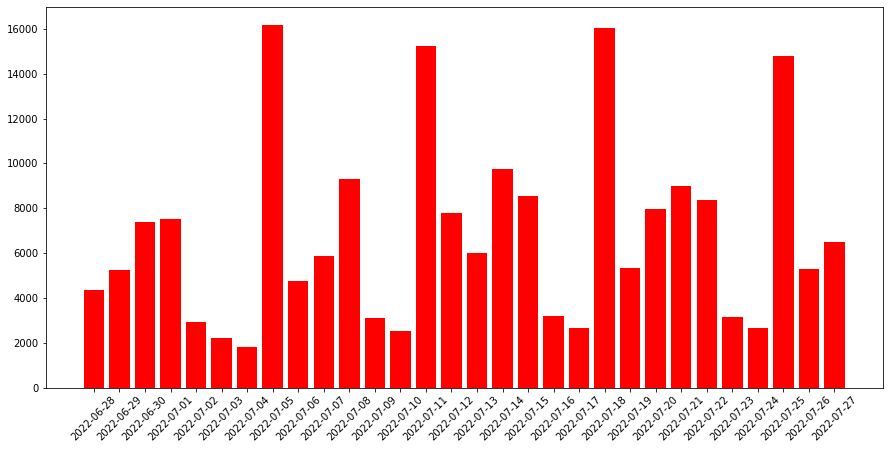

In [26]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_new_cases_30, color='red')
plt.xticks(rotation=45)
plt.show()

Highest in last 30 days was on 2022-07-04


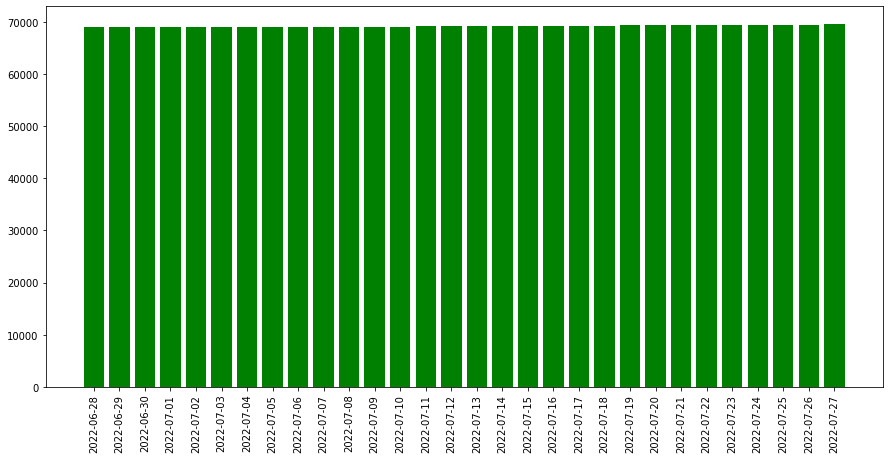

In [50]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_deaths_30, color='green')
plt.xticks(rotation=90)
plt.show()

# Comparing Covid 19 data with different states

Let's compare the Covid 19 cases after July for states: New York, California, Florida, Texas, Arizona

In [51]:
states = ['New York', 'California','Florida', 'Texas','Arizona']
print(states)

['New York', 'California', 'Florida', 'Texas', 'Arizona']


             date     state  fips   cases  deaths
13412  2020-11-01  New York    36  514482   33174
13467  2020-11-02  New York    36  516114   33187
13522  2020-11-03  New York    36  518431   33198
13577  2020-11-04  New York    36  520557   33222
13632  2020-11-05  New York    36  523559   33247
             date       state  fips   cases  deaths
13383  2020-11-01  California     6  938897   17671
13438  2020-11-02  California     6  944148   17700
13493  2020-11-03  California     6  949390   17751
13548  2020-11-04  California     6  954629   17818
13603  2020-11-05  California     6  960905   17866
             date    state  fips   cases  deaths
13388  2020-11-01  Florida    12  807404   16788
13443  2020-11-02  Florida    12  812055   16833
13498  2020-11-03  Florida    12  816692   16889
13553  2020-11-04  Florida    12  821115   16921
13608  2020-11-05  Florida    12  827372   16960
             date  state  fips   cases  deaths
13425  2020-11-01  Texas    48  957789   18582


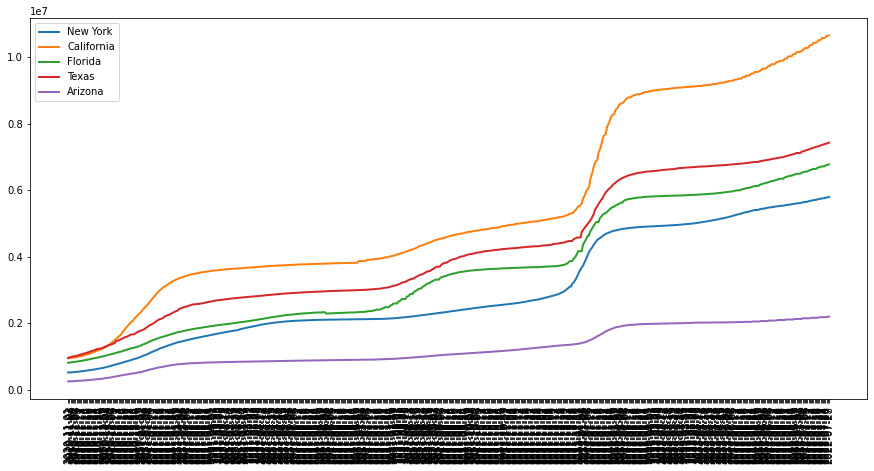

In [53]:
plt.figure(figsize=(15,7))
for state in states:
  df_st = df[(df['state']==state) & (df['date']>='2020-11-01')]

  print(df_st.head())
  plt.plot(df_st['date'],
           df_st['cases'],
           linewidth=2
           )
  plt.xticks(rotation=90)
plt.legend(states)
plt.show()


# Conclusion

Below are the conclusions:

california holds the highest rank in covid cases in and after the 2020-11-01
and Arizona holds the lowest cases after the 2020-11-01